<a href="https://colab.research.google.com/github/jrgrajek/Capstone/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [66]:
# Create a <pde; C;ass tjat omjerots nn.Module
class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  # Hidden Layer1( number of neurons)  -->
  # H2 (n) --> output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # Instantiate our nn.module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [67]:
# Pick a manual seed for randomization --> so audience can get similar numbers to him in tutorial
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [69]:
url = 'https://gist.githubusercontent.com/Thanatoz-1/9e7fdfb8189f0cdf5d73a494e4a6392a/raw/aaecbd14aeaa468cd749528f291aa8a30c2ea09e/iris_dataset.csv'
my_df = pd.read_csv(url)

In [70]:
my_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
# Change last column to numbers from their names
my_df['target'] = my_df['target'].replace('Iris-setosa',0.0)
my_df['target'] = my_df['target'].replace('Iris-versicolor',1.0)
my_df['target'] = my_df['target'].replace('Iris-virginica',2.0)
my_df

<ipython-input-71-dfd58ce054e5>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['target'] = my_df['target'].replace('Iris-virginica',2.0)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [72]:
# Train Test Split
X = my_df.drop('target', axis=1)
y = my_df['target']

In [73]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [76]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [77]:
# Set the criterion of model to measure the error, how far off the predictionsa are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer (popular one), lr = learning rate (if errror doesn't go down after a bunch of ineration (epochs), lower our learning rate )
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [78]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [79]:
# Train our Model
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # Do some back propogation: take the error rate of forward propogation and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1251550912857056
Epoch: 10 Loss: 1.0096259117126465
Epoch: 20 Loss: 0.8157405853271484
Epoch: 30 Loss: 0.585706353187561
Epoch: 40 Loss: 0.3999636471271515
Epoch: 50 Loss: 0.26768800616264343
Epoch: 60 Loss: 0.17942361533641815
Epoch: 70 Loss: 0.12151690572500229
Epoch: 80 Loss: 0.0860118493437767
Epoch: 90 Loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

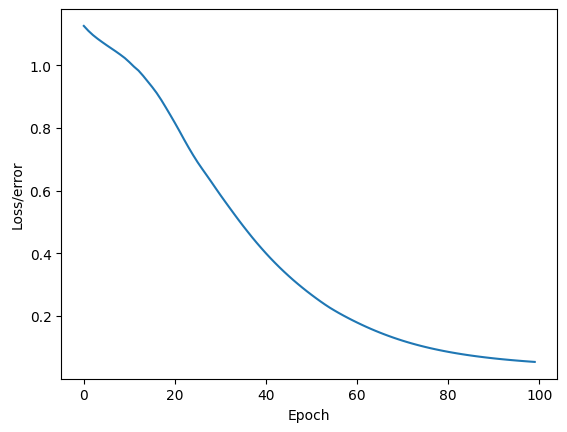

In [80]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

In [81]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are feature from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [82]:
loss

tensor(0.1315)

In [103]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0.0:
      x = 'Iris-setosa'
    elif y_test[i] == 1.0:
      x = 'Iris-versicolor'
    else:
      x = 'Iris-virginica'

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1:2}.) {str(y_val):<25} {x:<15} {y_test[i]:<5} {y_val.argmax().item():<5}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')

 1.) tensor([-5.8760,  4.4628,  6.5124]) Iris-virginica  2     2    
 2.) tensor([-7.5436,  4.1670,  9.7255]) Iris-virginica  2     2    
 3.) tensor([-8.4504,  5.1271, 10.1987]) Iris-virginica  2     2    
 4.) tensor([-4.3398,  5.6267,  2.5608]) Iris-versicolor 1     1    
 5.) tensor([-7.1825,  4.8754,  8.2992]) Iris-virginica  2     2    
 6.) tensor([-3.3974,  5.3463,  1.2803]) Iris-versicolor 1     1    
 7.) tensor([-5.9231,  4.9822,  5.9997]) Iris-virginica  2     2    
 8.) tensor([-4.2881,  5.7003,  2.3889]) Iris-versicolor 1     1    
 9.) tensor([-6.5356,  4.9257,  7.1260]) Iris-virginica  2     2    
10.) tensor([-8.0509,  4.4129, 10.3286]) Iris-virginica  2     2    
11.) tensor([-5.6762,  4.9500,  5.6215]) Iris-virginica  2     2    
12.) tensor([ 4.5662, -2.2476, -2.8911]) Iris-setosa     0     0    
13.) tensor([ 4.2571, -1.9967, -2.7330]) Iris-setosa     0     0    
14.) tensor([-2.1108,  4.0515,  0.5799]) Iris-versicolor 1     1    
15.) tensor([ 3.4575, -1.2098, -2.

In [ ]:
print(f'{1}.) {42}')



In [ ]:
for i, y_val in enumerate([42, 63, 84]):
    print(f'{i+1}.) {str(y_val)}')
